In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import seaborn as sns

In [2]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
# Print variable shapes
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


In [4]:
# Print sample images from each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

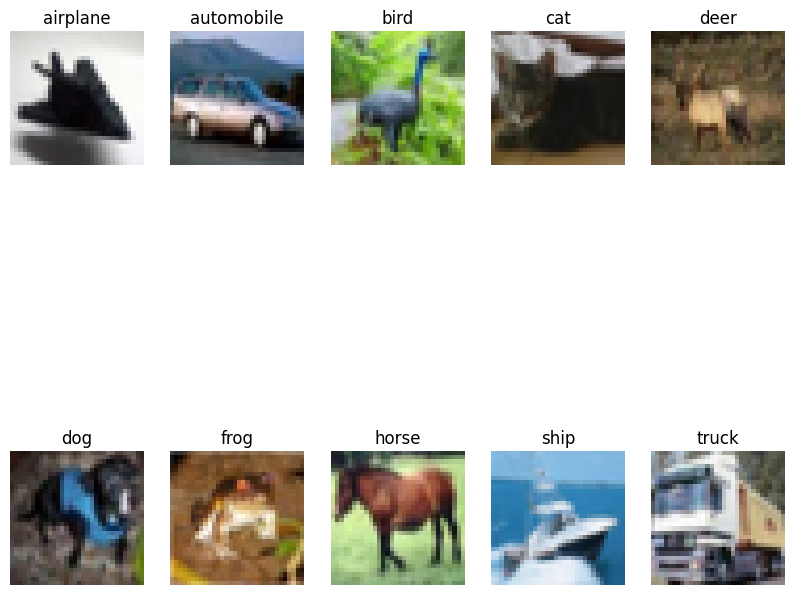

In [5]:
plt.figure(figsize=(10, 10))
for i in range(10):
    class_indices = np.where(np.argmax(y_train, axis=1) == i)[0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[class_indices[0]], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

In [6]:
# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 14s 5ms/step - loss: 1.5039 - accuracy: 0.4543 - val_loss: 1.1962 - val_accuracy: 0.5774
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1338 - accuracy: 0.5993 - val_loss: 1.0464 - val_accuracy: 0.6284
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9942 - accuracy: 0.6481 - val_loss: 0.9895 - val_accuracy: 0.6475
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9014 - accuracy: 0.6858 - val_loss: 0.9441 - val_accuracy: 0.6757
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8339 - accuracy: 0.7069 - val_loss: 0.9105 - val_accuracy: 0.6836
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7802 - accuracy: 0.7279 - val_loss: 0.8504 - val_accuracy: 0.7067
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7368 - accuracy: 0.7424 - val_loss: 0.9047 - val_accuracy

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 - 1s - loss: 0.8619 - accuracy: 0.7068 - 957ms/epoch - 3ms/step
Test accuracy: 70.68%


In [11]:
# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

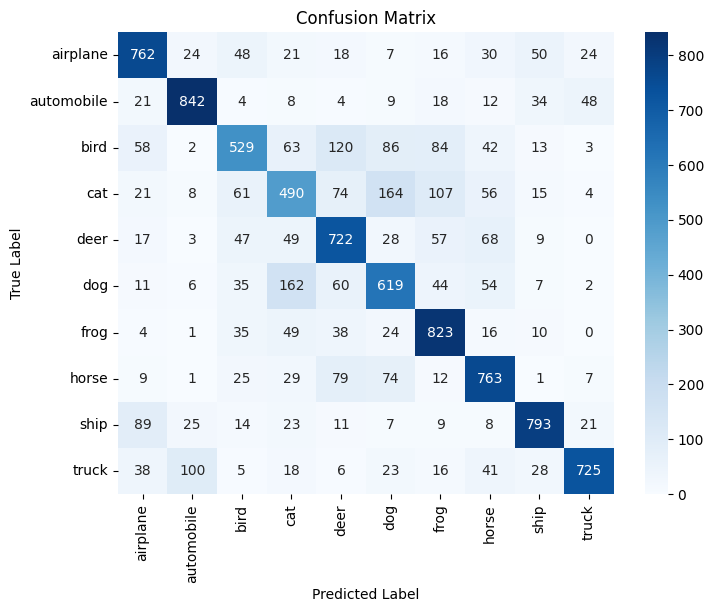

In [13]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
# ROC Curves
fpr = dict()
tpr = dict()
roc_auc = dict()

In [15]:
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

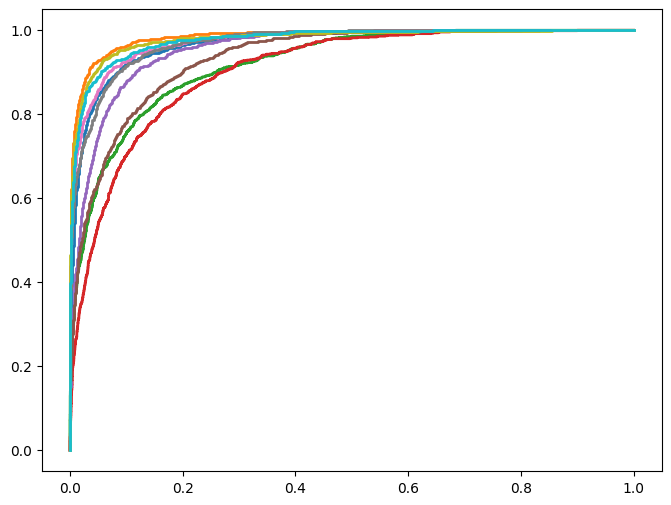

In [16]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

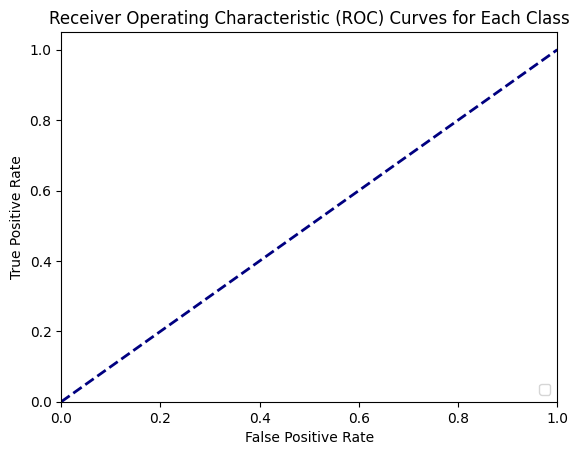

In [17]:
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc='lower right')
plt.show()

In [18]:
# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    airplane       0.74      0.76      0.75      1000
  automobile       0.83      0.84      0.84      1000
        bird       0.66      0.53      0.59      1000
         cat       0.54      0.49      0.51      1000
        deer       0.64      0.72      0.68      1000
         dog       0.59      0.62      0.61      1000
        frog       0.69      0.82      0.75      1000
       horse       0.70      0.76      0.73      1000
        ship       0.83      0.79      0.81      1000
       truck       0.87      0.72      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

